El sector de Marketing requiere de un análisis exhaustivo sobre sus campañas lanzadas, cuentan con un dato que denominan “conversión” y tiene que ver con que si un cliente, hizo un consumo, en base a la campaña que se le hizo llegar. Ese dato nos dice el grado de efectividad de las campañas. El requisito es la creación de un modelo predictivo que logre predecir la efectividad de una campaña en base a sus características.

Se provee de un csv con los siguientes campos:
* Costo1 y Costo2: son índices de costo de puesta en marcha de la campaña.
* Tópico: Tiene que ver con la temática en la que está basada la campaña.
* Quincena: Es la quincena en el año, se toman 2 por mes.
* TipoProducto: Son las categorías de los productos.
* Conversión: Si el cliente compró o no el producto.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [3]:
from IPython.display import clear_output

In [4]:
df_conversiones = pd.read_csv("../Datasets/conversiones.csv", sep=",")

In [5]:
df_conversiones.head()

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion
0,0.341,0.299,2,7,1,Si
1,0.151,0.079,2,8,1,Si
2,0.384,0.324,4,9,1,Si
3,0.200,0.192,4,9,1,Si
4,0.415,0.020,2,8,1,Si


In [6]:
df_conversiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319946 entries, 0 to 319945
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Costo1        319946 non-null  float64
 1   Costo2        319946 non-null  float64
 2   Topico        319946 non-null  int64  
 3   Quincena      319946 non-null  int64  
 4   TipoProducto  319946 non-null  int64  
 5   Conversion    319946 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 14.6+ MB


In [7]:
df_conversiones.describe()

,Costo1,Costo2,Topico,Quincena,TipoProducto
count,319946.000000,319946.000000,319946.000000,319946.000000,319946.000000
mean,0.349474,0.361730,2.966194,12.845168,4.502994
std,0.270063,0.278102,1.172870,6.493443,2.179622
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.134000,0.138000,2.000000,7.000000,3.000000
50%,0.273000,0.280000,3.000000,13.000000,5.000000
75%,0.502000,0.556000,4.000000,19.000000,6.000000
max,1.000000,1.000000,5.000000,24.000000,8.000000


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_conversiones['Conversion2'] = le.fit_transform(df_conversiones['Conversion'])

In [9]:
df_conversiones.head()

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion,Conversion2
0,0.341,0.299,2,7,1,Si,1
1,0.151,0.079,2,8,1,Si,1
2,0.384,0.324,4,9,1,Si,1
3,0.200,0.192,4,9,1,Si,1
4,0.415,0.020,2,8,1,Si,1


In [10]:
df = df_conversiones.drop(['Conversion'], axis=1) #,inplace=True

In [11]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

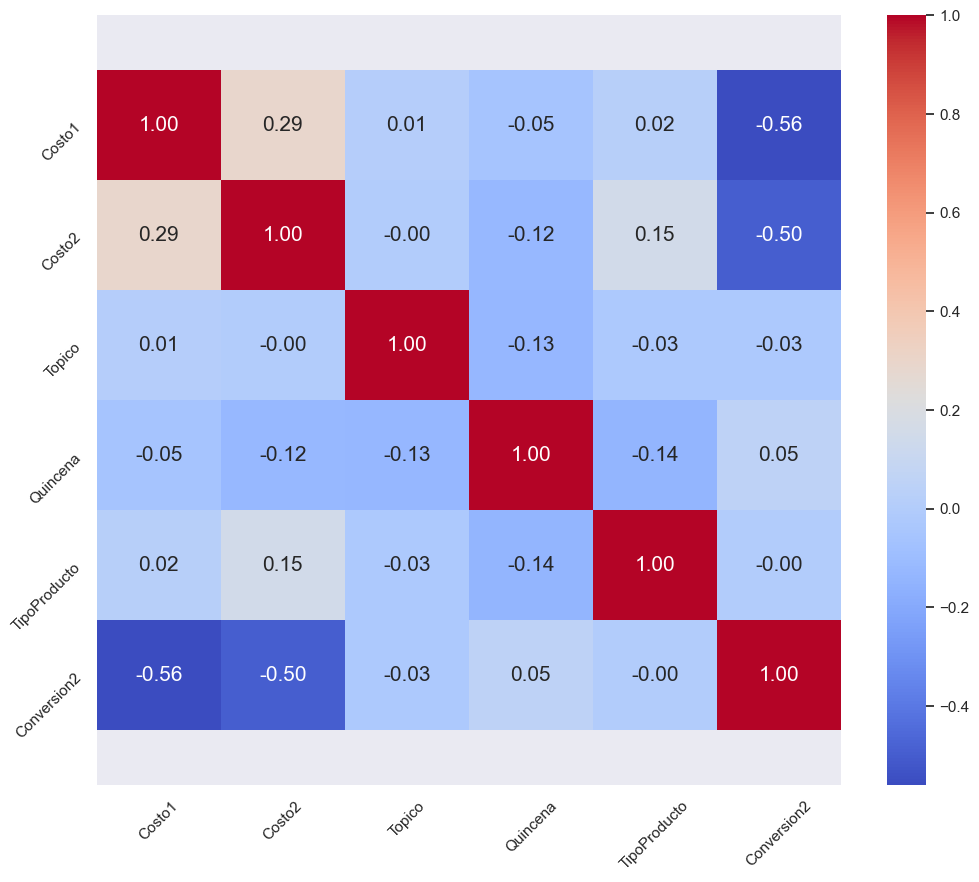

In [11]:
corr = df.corr()
plot_corre_heatmap(corr)

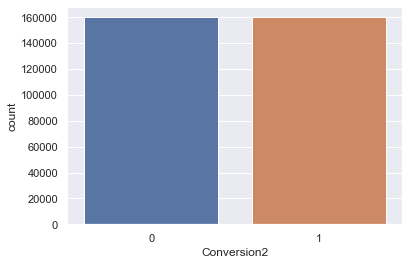

In [12]:
sns.countplot(x='Conversion2', data=df) #equivelante a sns.countplot(df.Conversion2)
plt.show()

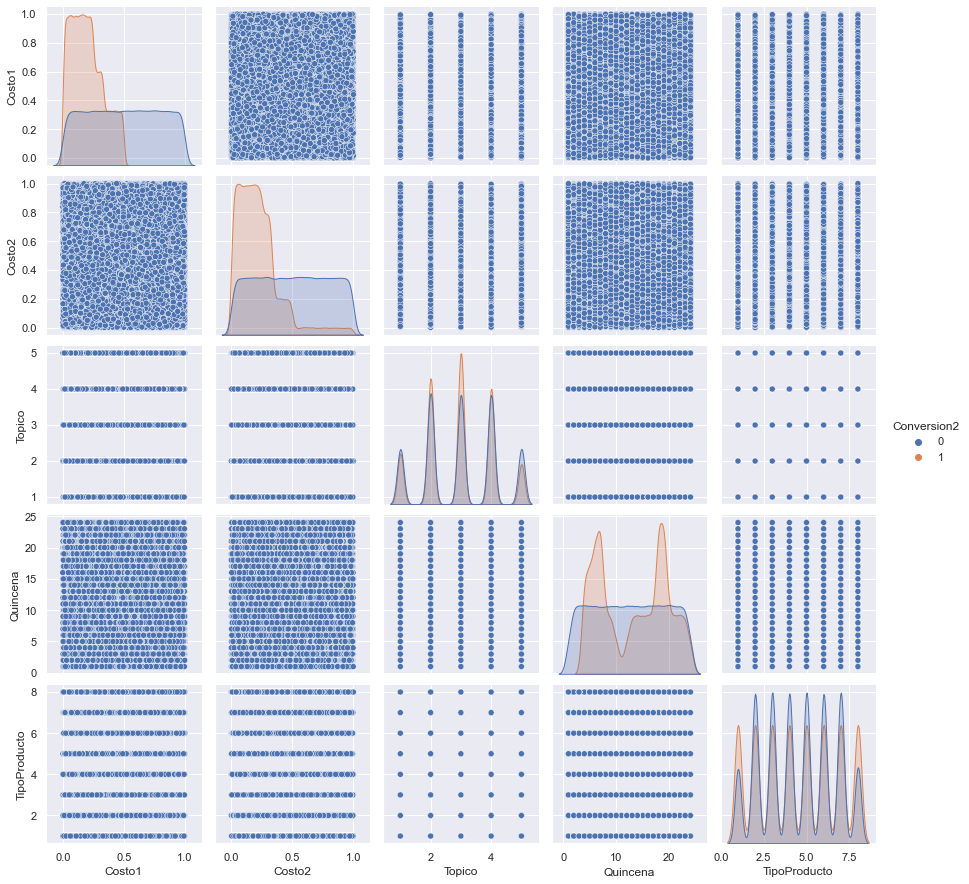

In [13]:
sns.pairplot(df, hue = 'Conversion2')
plt.show()

In [14]:
X = df[['Costo1','Costo2','Topico','Quincena','TipoProducto']]
y = df['Conversion2']

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [16]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


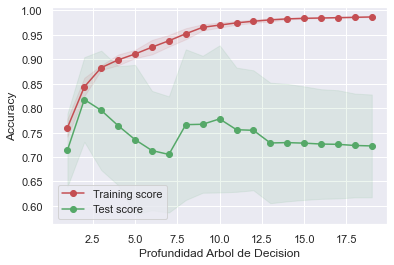

In [17]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [18]:
X = df[['Costo1','Costo2']]

In [19]:
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,20,1)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

Completado: 100.0%


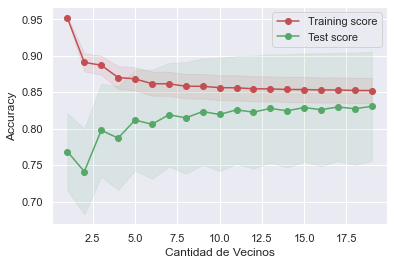

In [20]:
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

In [21]:
X = df[['Costo1','Costo2','Topico','Quincena','TipoProducto']]

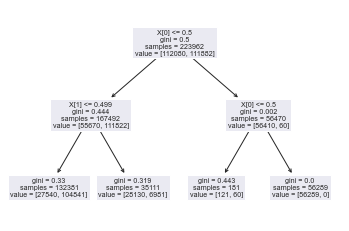

In [22]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth = 2)

tree.plot_tree(clf.fit(X_train,y_train))
plt.show()